In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from skimage import data as sk_data
from flowdec import data as fd_data
from codex.ops import drift_compensation
from skimage.feature import register_translation

/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 2D Example

Known offset (y, x): (-58.6, 14.32)
Recovered offset (y, x): [ 58 -14]


<Figure size 432x288 with 0 Axes>

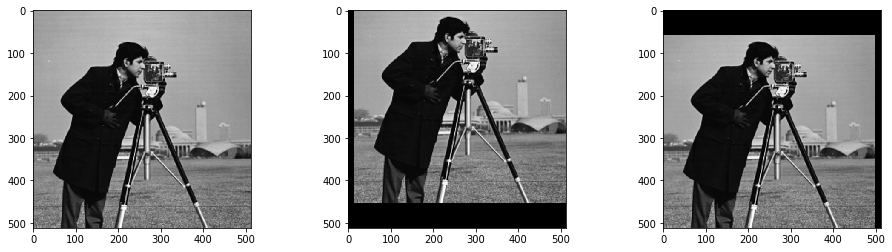

In [92]:
plt.gray()
ref_img = sk_data.camera()
shift = (-58.6, 14.32)
offset_img = sp.ndimage.shift(ref_img, shift)
print("Known offset (y, x): {}".format(shift))

calculate_op = drift_compensation.TranslationCalculator(2).initialize()
res_shift = calculate_op.run(ref_img, offset_img)['translation']
print("Recovered offset (y, x): {}".format(res_shift))

apply_op = drift_compensation.TranslationApplier(2).initialize()
recovered_image = apply_op.run(offset_img, res_shift)

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(16, 4)
axs[0].imshow(ref_img)
axs[1].imshow(offset_img)
axs[2].imshow(recovered_image['result'])

In [47]:
import imp
imp.reload(drift_compensation)

<module 'codex.ops.drift_compensation' from '/Users/eczech/repos/hammer/codex/python/pipeline/codex/ops/drift_compensation.py'>

## 3D Example

In [2]:
from flowdec.nb import utils as nb_utils
ref_img = fd_data.bars_25pct().actual
ref_img = ref_img[:,:48,:]
#shift = (-31, 25, 3)
shift = (10, -5, 15)
offset_img = sp.ndimage.shift(ref_img, shift)
print("Known offset (y, x): {}".format(shift))

Known offset (y, x): (10, -5, 15)


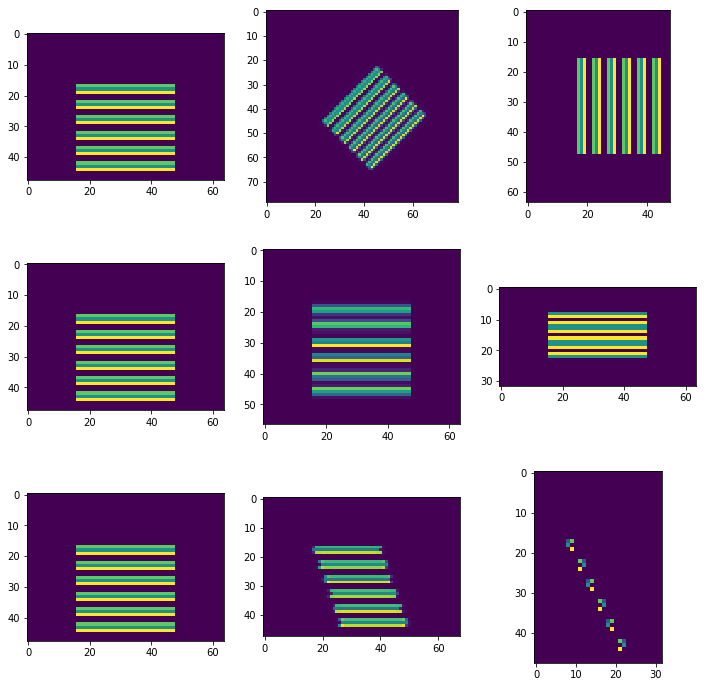

In [3]:
nb_utils.plot_rotations(ref_img)

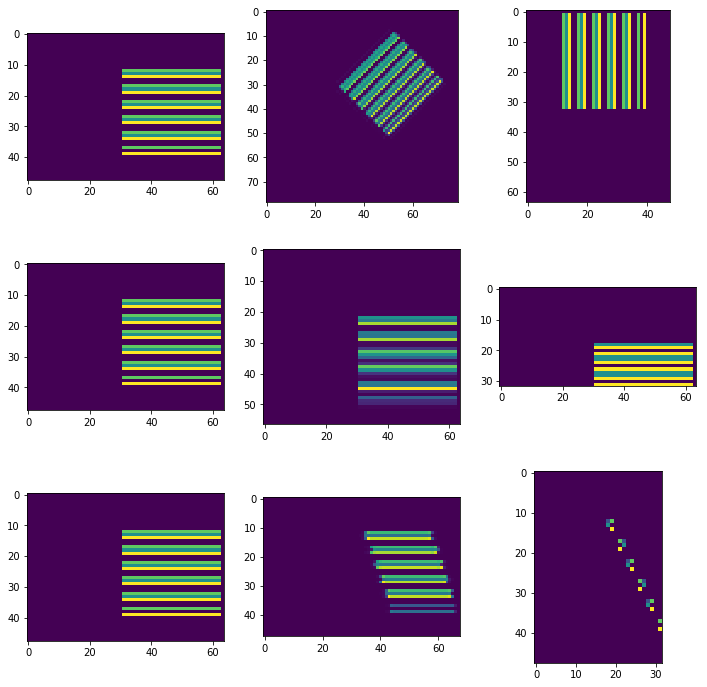

In [4]:
nb_utils.plot_rotations(offset_img)

In [29]:
import imp
imp.reload(drift_compensation)

<module 'codex.ops.drift_compensation' from '/Users/eczech/repos/hammer/codex/python/pipeline/codex/ops/drift_compensation.py'>

In [30]:
calculate_op = drift_compensation.TranslationCalculator(ref_img.ndim).initialize()
res_shift = calculate_op.run(ref_img, offset_img)
res_shift['translation']

array([-10,   5, -15], dtype=int32)

In [31]:
apply_op = drift_compensation.TranslationApplier(ref_img.ndim).initialize()
recovered_img = apply_op.run(offset_img, res_shift['translation'])['result']

InvalidArgumentError: You must feed a value for placeholder tensor 'translation' with dtype int32 and shape [3]
	 [[Node: translation = Placeholder[dtype=DT_INT32, shape=[3], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'translation', defined at:
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-36b1fe161016>", line 1, in <module>
    apply_op = drift_compensation.TranslationApplier(ref_img.ndim).initialize()
  File "/Users/eczech/repos/hammer/codex/python/pipeline/codex/ops/op.py", line 113, in initialize
    inputs, outputs = self._build_graph()
  File "/Users/eczech/repos/hammer/codex/python/pipeline/codex/ops/drift_compensation.py", line 67, in _build_graph
    translation = tf.placeholder(tf.int32, shape=[self.n_dims], name='translation')
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1777, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 4521, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'translation' with dtype int32 and shape [3]
	 [[Node: translation = Placeholder[dtype=DT_INT32, shape=[3], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [22]:
recovered_img.shape

(32, 48, 64)

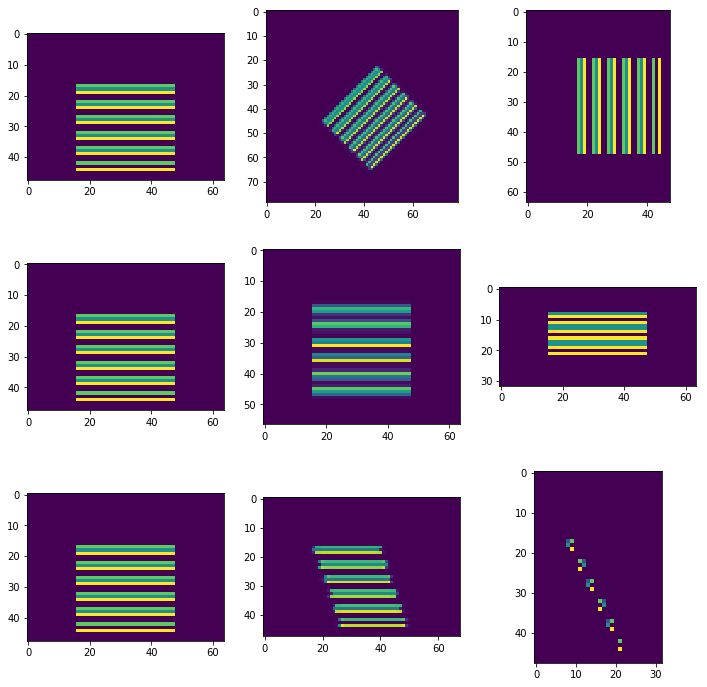

In [23]:
nb_utils.plot_rotations(recovered_img)

In [24]:
from scipy.stats import describe
delta_img = recovered_img - ref_img
describe(delta_img.ravel())

DescribeResult(nobs=98304, minmax=(-32767.5, 1.8654675e-11), mean=-15.999756, variance=436641.72, skewness=-44.5833740234375, kurtosis=2084.0890889059483)

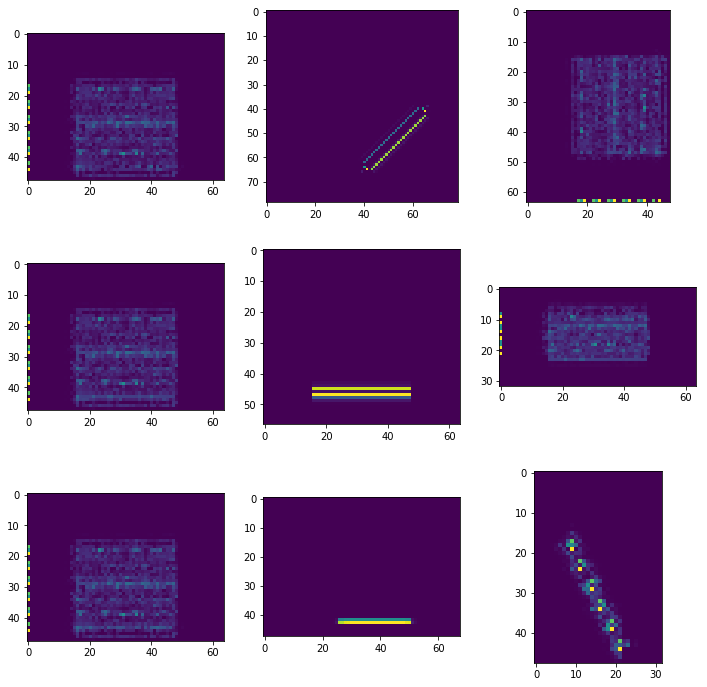

In [25]:
nb_utils.plot_rotations(delta_img)

## 5D Example

In [2]:
from flowdec.nb import utils as nb_utils
from codex import simulation

In [4]:
tile, config, info = simulation.load_simulated_bars_experiment(blur=False)

In [5]:
print("Known offset (y, x): {}, Shape: {}".format(info['shift'], tile.shape))

Known offset (y, x): (10, -5, 15), Shape: (3, 32, 4, 48, 64)


In [7]:
op = drift_compensation.CodexDriftCompensator(config).initialize()

Instructions for updating:
Use the retry module or similar alternatives.


In [8]:
res = op.run(tile)

In [9]:
res.shape

(3, 32, 4, 48, 64)

In [10]:
nb_utils.plot_rotations(res[0, :, 0, :, :])

NameError: name 'nb_utils' is not defined

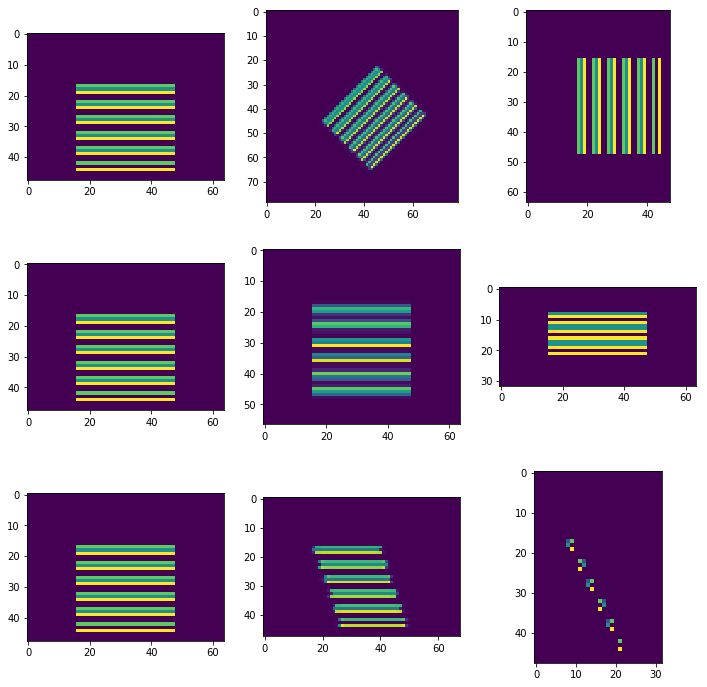

In [52]:
nb_utils.plot_rotations(res[1, :, 0, :, :])

In [111]:
import tensorflow as tf
tf.reset_default_graph()

# x = np.zeros([3, 4, 5])
# x[0, 0, 4] = 1
# x[0, 1, 1] = 1
# x = np.zeros([3, 4])
# x[2, 1] = 1
# x = tf.constant(x)
#x = tf.reverse(tf.constant([1, 2, 3]), axis=[0])
z = tf.ones(10)[3:1]

def coord_max(t):
    idx = tf.argmax(tf.reshape(t, [-1]), output_type=tf.int32)
    return tf.squeeze(tf.unravel_index(idx, tf.shape(t)))
    
#idx = tf.argmax(tf.reshape(x, [-1]), output_type=tf.int32)
#y = coord_max(x)
with tf.Session() as sess:
    r = sess.run([z])
r[0].shape

(0,)